# Set up 

In [1]:
import numpy as np
import os
import sys

# Get the absolute path of the parent directory of the current file (which is 'test')
# current_dir = os.getcwd()
# model_path = os.path.join(current_dir, '..', 'model')
# sys.path.append(model_path)
sys.path.append('..')

from model.Force import HullForce, ControlForce, TowingForce
from model.RigidBody import RigidBody
from model.Simulation import Simulation, Simulation_Result

In [2]:
# Set parameters
m = 0.877 # kg
Vol = 733159.45810955 * 10 ** (-9) #m3
Iyy = 6610.17475482 * 10 ** (-6)  #kgm2
hull_surface_area = 0.05 #m2

r_xi = -111.76 * 10 ** (-3)
r_zi = 0.722 * 10 ** (-3)

r_xh = -0.01
r_zh = 0.01

r_xb = 0
r_zb = 0

r_xt = 42.9 * 10 ** (-3)
r_zt = -35.18 * 10 ** (-3)

rho = 1000

# Aero foil parameters
AR = 2.61 #aspect ratio
area = 0.025 #Surface area
C_L_a = 0.1/np.deg2rad(1)
C_L_alpha_offset = 0.5
C_D_0 = 0.02

## Initialize the models

In [3]:
rigidbody = RigidBody(m, Vol, Iyy, np.array([r_xb, r_zb]))
towForce = TowingForce(np.array([r_xt,r_zt]),10,np.deg2rad(30))
controlForce = ControlForce(np.array([r_xi,r_zi]),np.deg2rad(-5),AR,area,C_L_a,C_L_alpha_offset,C_D_0)
hullForce = HullForce(hull_surface_area,np.array([r_xh,r_zh]))

sim = Simulation(rigidbody,towForce,hullForce,[controlForce])

# Solve Equilibrium Point

In [4]:
#Find equilibrium by minimizing Forces and moment individually using least squares
results_LS = sim.solve_equilibrium_state_LS(2)

initial_state = np.zeros(9)
initial_state[2] = results_LS[0]
initial_state[3] = 2

print()


Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -4.75           degrees   
Delta_t         14.92           degrees   
Towing Force    95.78           N         
Delta_i         5.14            degrees   
----------------------
Fx:             0.00           N         
Fz:             -0.00          N         
My:             0.00           Nm        
Residual Norm: 0.000000
Optimization successful!



### Equilibrium Simulation

In [5]:
#print(initial_state)
sim_result_ivp, solution = sim.simulate_solve_ivp(200, 0.01, initial_state) ## RK45 Solver
sim_result_ivp.plot_simulation_results()

hello
hello
hello
hello


IndexError: index 201 is out of bounds for axis 0 with size 201

### Perturbation Simulation

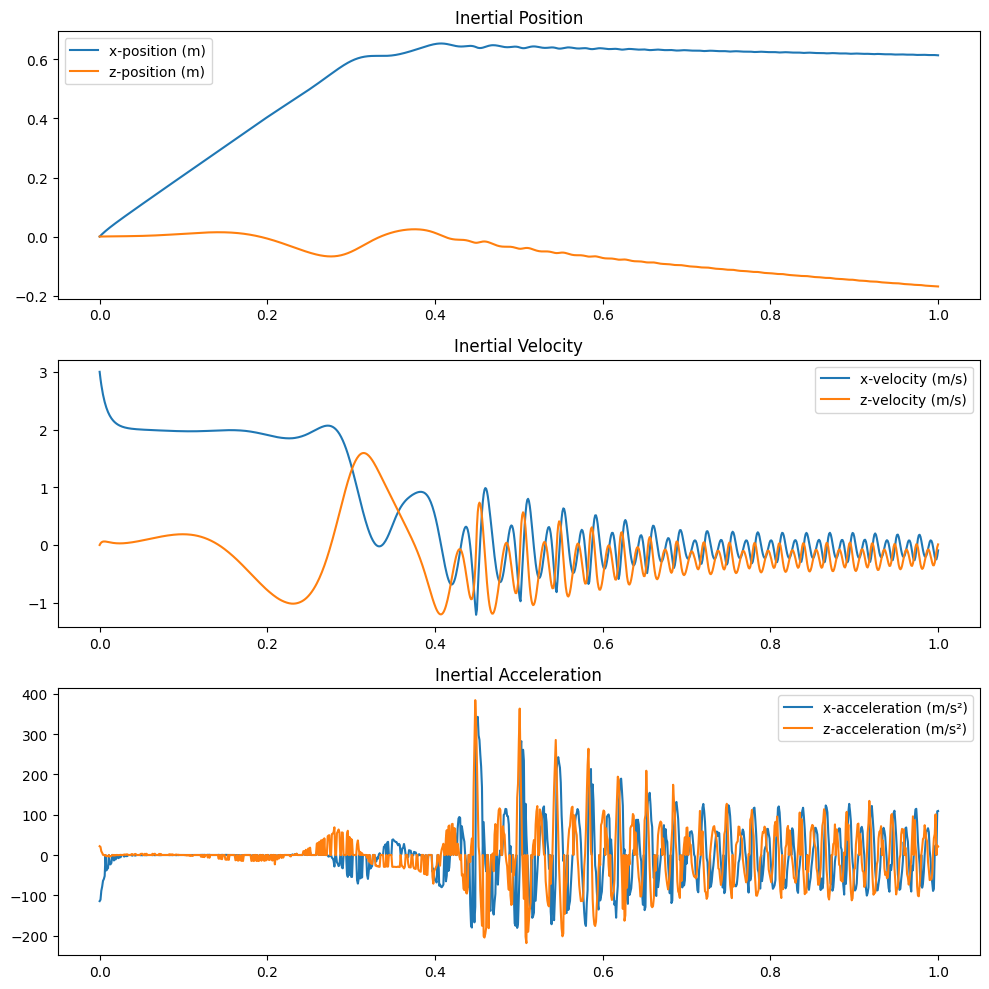

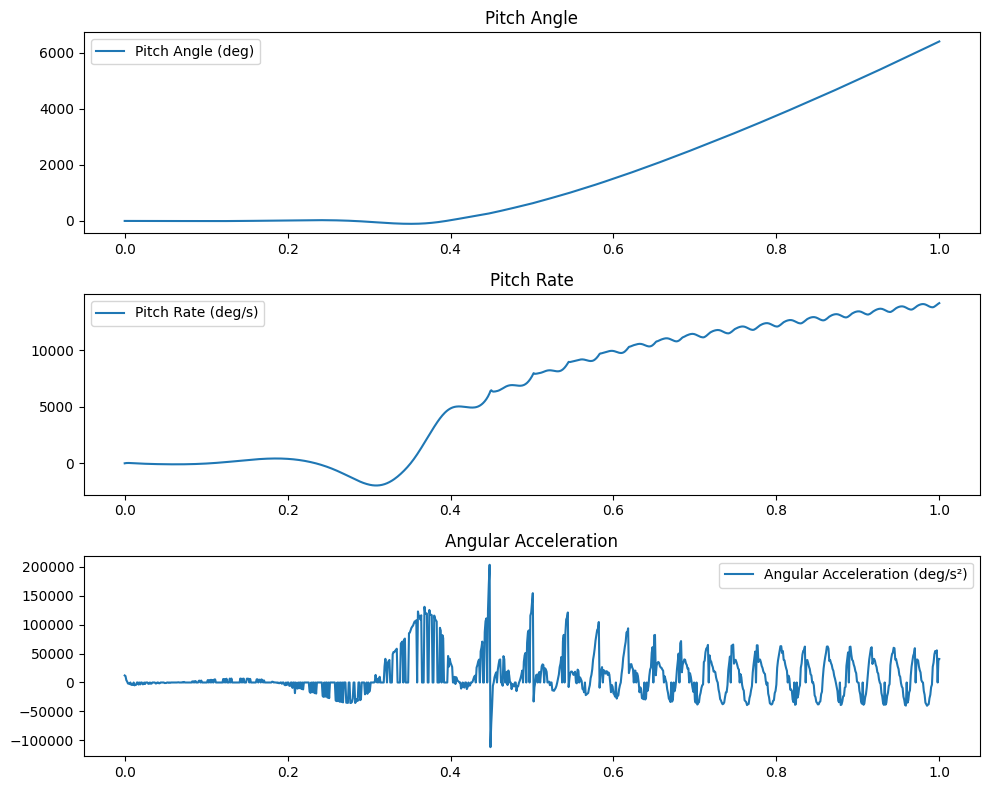

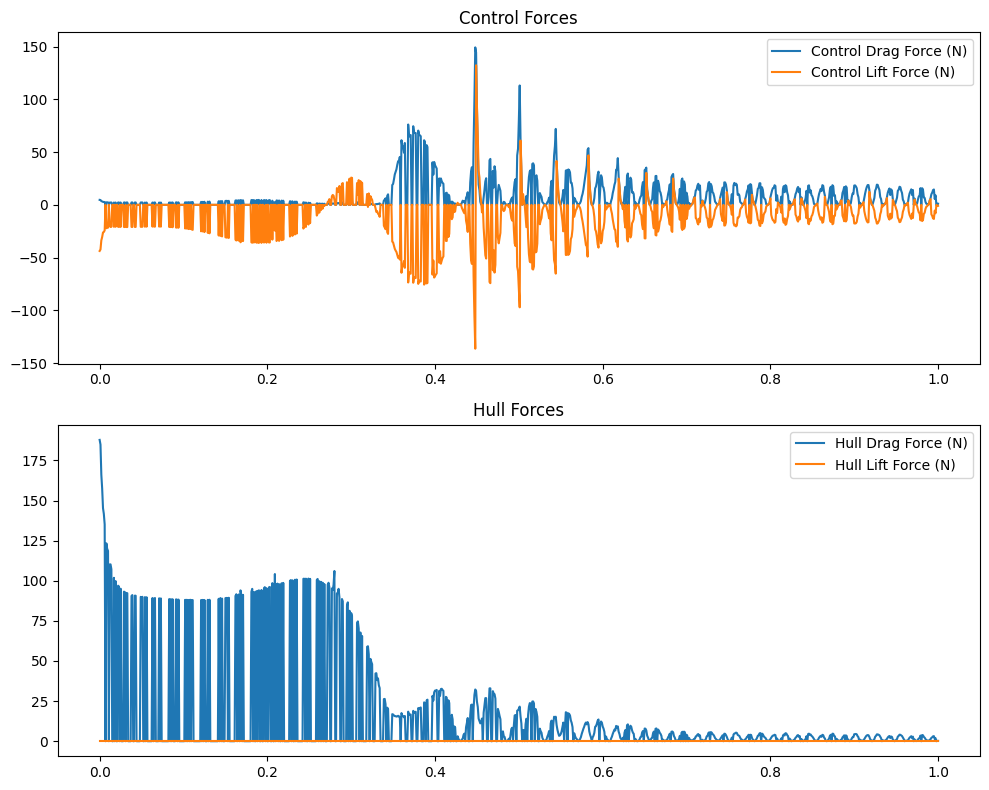

In [10]:
perturbed_state = np.copy(initial_state) 
perturbed_state[3] += 1 #Change Velocity

sim_result_ivp, solution = sim.simulate_solve_ivp(1000, 0.001, perturbed_state)
sim_result_ivp.plot_simulation_results()